In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

bnb = pd.read_csv("BNB_USD.csv")

bnb.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1556,2022-02-12,400.499023,407.139740,394.799500,403.389740,403.389740,1372516416
1557,2022-02-13,403.271576,406.712769,395.655334,398.886780,398.886780,1151509777
1558,2022-02-14,398.643127,403.934479,391.383667,403.660797,403.660797,1269083662
1559,2022-02-15,403.664215,436.248108,403.094940,432.409393,432.409393,2538883559
1560,2022-02-16,431.615417,433.355255,423.742218,426.656799,426.656799,1652900864


In [2]:
#Checking dataset info and missing values
bnb.info()
bnb.isnull().sum() 

#should show 1561 rows of non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1561 non-null   object 
 1   Open       1561 non-null   float64
 2   High       1561 non-null   float64
 3   Low        1561 non-null   float64
 4   Close      1561 non-null   float64
 5   Adj Close  1561 non-null   float64
 6   Volume     1561 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 85.5+ KB


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [3]:
#setting index as date
bnb['Date'] = pd.to_datetime(bnb.Date,format='%Y-%m-%d')
bnb.index = bnb['Date']
#del bnb['Date']

bnb = bnb[['Adj Close']]

bnb.tail()

,Adj Close
Date,
2022-02-12,403.389740
2022-02-13,398.886780
2022-02-14,403.660797
2022-02-15,432.409393
2022-02-16,426.656799


<AxesSubplot:xlabel='Date'>

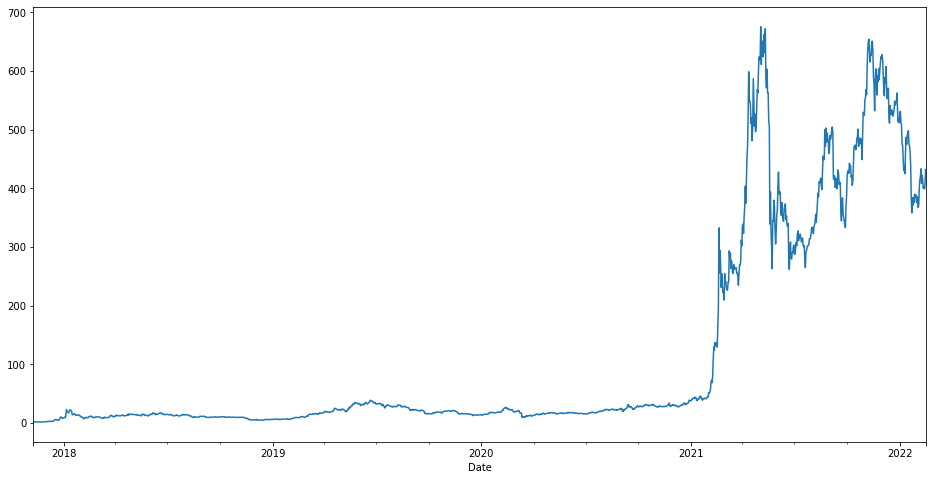

In [4]:
#bnb.plot(figsize=(16,8))
bnb["Adj Close"].plot(figsize=(16,8))

In [5]:
#calculate the Exponential Moving Average: EMA
bnb['EMA10'] = bnb['Adj Close'].ewm(span=10, adjust=False).mean()

#double check on our data & making sure no null/NaN values
bnb

bnb.info()

,Adj Close,EMA10
Date,,
2017-11-09,1.990770,1.990770
2017-11-10,1.796840,1.955510
2017-11-11,1.670470,1.903685
2017-11-12,1.519690,1.833867
2017-11-13,1.686620,1.807095
...,...,...
2022-02-12,403.389740,406.524797
2022-02-13,398.886780,405.136067
2022-02-14,403.660797,404.867836


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1561 entries, 2017-11-09 to 2022-02-16
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1561 non-null   float64
 1   EMA10      1561 non-null   float64
dtypes: float64(2)
memory usage: 36.6 KB


<AxesSubplot:xlabel='Date'>

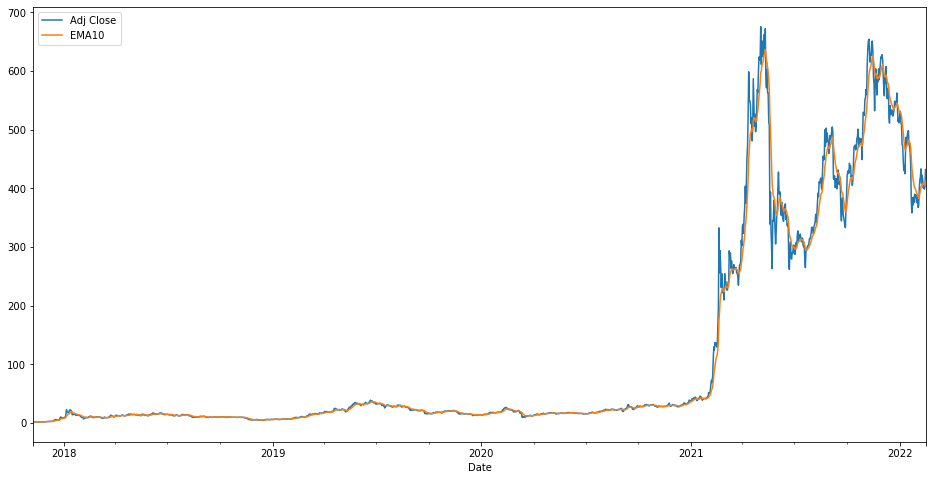

In [6]:
close_vs_ema = ['Adj Close','EMA10']
bnb[close_vs_ema].plot(figsize=(16,8))

### Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

#80:20 ratio split 80% training 20% test
X_train, X_test, y_train, y_test = train_test_split(bnb[['Adj Close']], bnb[['EMA10']], test_size=0.20, random_state=1)

#diplaying test and training set
X_test.describe()
X_train.describe()

,Adj Close
count,313.000000
mean,113.153113
std,182.662147
min,1.519690
25%,13.699100
50%,21.705067
75%,41.734600
max,672.333923


,Adj Close
count,1248.000000
mean,114.006164
std,181.737517
min,1.510360
25%,12.869225
50%,19.119098
75%,42.802238
max,675.684082


### Linear Regression & Validating Fit

LinearRegression()

Linear Model Root mean square error: 15.836766564997525
MSE: 250.80317523422352
R-squared: 0.9921002821275322
Adjusted R-squared: 0.9920748811054343
Coefficients: [[0.98948031]]
Intercept: [0.3573632]


<Figure size 720x576 with 0 Axes>

Text(0.5, 0, "Predicted Price ['Adj Close']")

Text(0, 0.5, 'Actual Price')

Text(0.5, 1.0, 'Linear Regression Model')

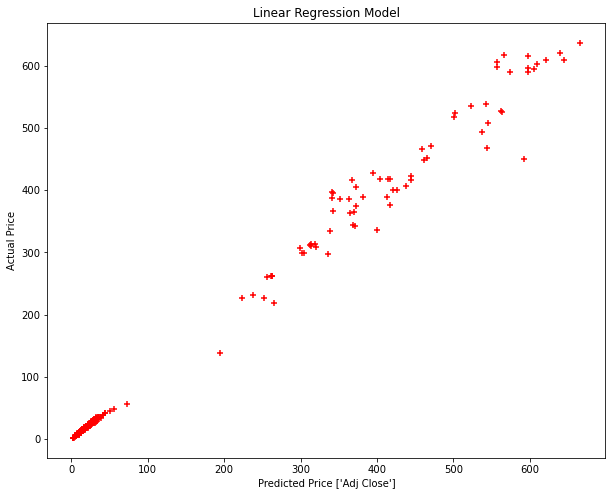

In [8]:
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

lm = LinearRegression()

#fit the variables into the model
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
adj_r2 = 1 - (len(y_test)-1)/(len(y_test)-len(X_test.columns)-1)*(1 - r2)
coefficient = lm.coef_
intercept = lm.intercept_

lr_mse=math.sqrt(mse)
print("Linear Model Root mean square error:",lr_mse)
print("MSE:", mse)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)
print("Coefficients:", coefficient)
print("Intercept:", intercept)

# Plot our predictions
plt.figure(figsize=(10,8))
plt.scatter(predictions, y_test, s=30, c='r', marker='+')
plt.xlabel(f"Predicted Price {X_test.columns.values}")
plt.ylabel("Actual Price")
plt.title('Linear Regression Model')

### KNearest Neighbours Model

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

Best Estimator: 6
Best Params: {'n_neighbors': 6}
Best Score: 0.9901156378592206
KNN Model Root mean square error 17.230549749826356
MSE: 296.8918446812411
R-squared: 0.9906485960178614


<Figure size 720x576 with 0 Axes>

Text(0.5, 0, 'Predicted Price [0]')

Text(0, 0.5, 'Actual Price')

Text(0.5, 1.0, 'KNN Model')

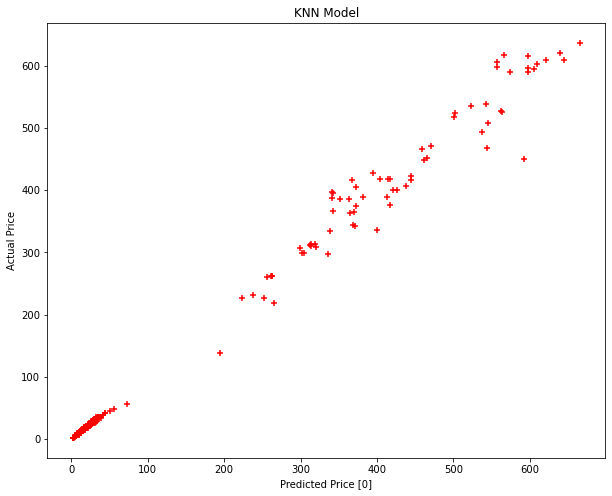

In [9]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#scaling data
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(X_train,y_train)
preds = model.predict(X_test)

print("Best Estimator:", model.best_estimator_.n_neighbors) 
print("Best Params:", model.best_params_)
print("Best Score:", model.best_score_)

mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

knn_mse=math.sqrt(mse)
print("KNN Model Root mean square error",knn_mse)
print("MSE:", mse)
print("R-squared:", r2)

# Plot our predictions
plt.figure(figsize=(10,8))
plt.scatter(predictions, y_test, s=30, c='r', marker='+')
plt.xlabel(f"Predicted Price {X_test.columns.values}")
plt.ylabel("Actual Price")
plt.title('KNN Model')

KNeighborsRegressor(n_neighbors=6)

KNN Model Root mean square error 17.230549749826356
MSE: 296.8918446812411
R-squared: 0.9906485960178614


<Figure size 720x576 with 0 Axes>

Text(0.5, 0, 'Predicted Price [0]')

Text(0, 0.5, 'Actual Price')

Text(0.5, 1.0, 'KNN Model')

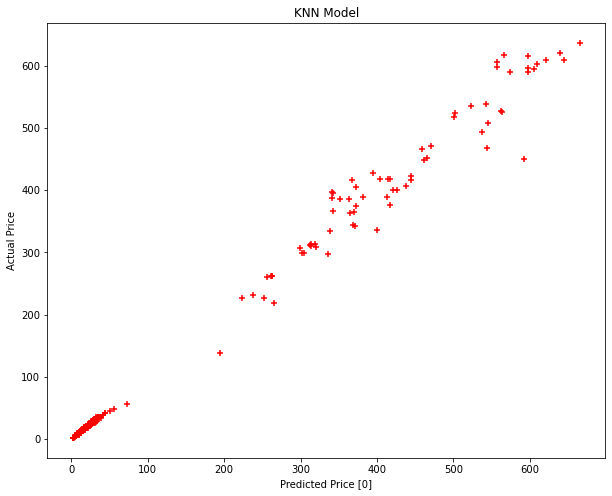

In [11]:
#improvement with best params
knn = neighbors.KNeighborsRegressor(n_neighbors=6)

knn.fit(X_train,y_train)
preds = knn.predict(X_test)

mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

knn_mse=math.sqrt(mse)
print("KNN Model Root mean square error",knn_mse)
print("MSE:", mse)
print("R-squared:", r2)

# Plot our improved predictions
plt.figure(figsize=(10,8))
plt.scatter(predictions, y_test, s=30, c='r', marker='+')
plt.xlabel(f"Predicted Price {X_test.columns.values}")
plt.ylabel("Actual Price")
plt.title('KNN Model')